Classification Accuracies:
Learning Rate   Train Accuracy(%) Validation Accuracy(%) Test Accuracy(%)
0.01            100.00          100.00              100.00         
0.1             100.00          100.00              100.00         
0.5             100.00          100.00              100.00         


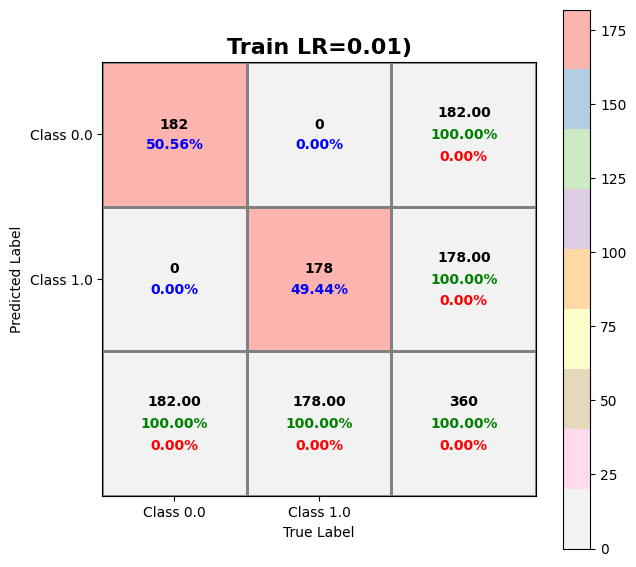

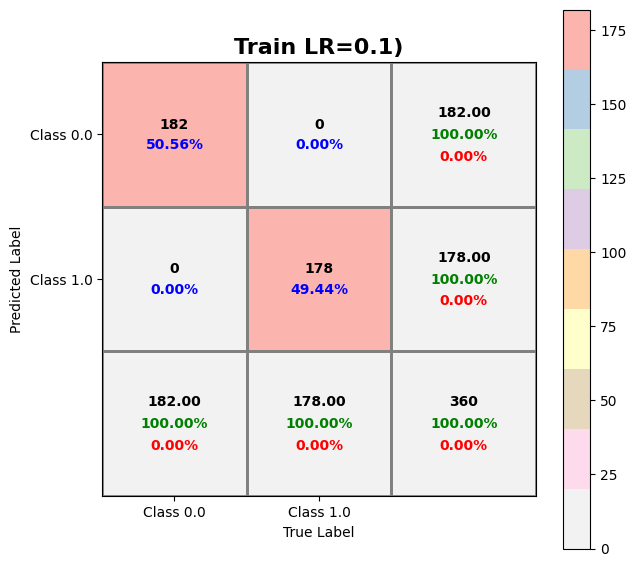

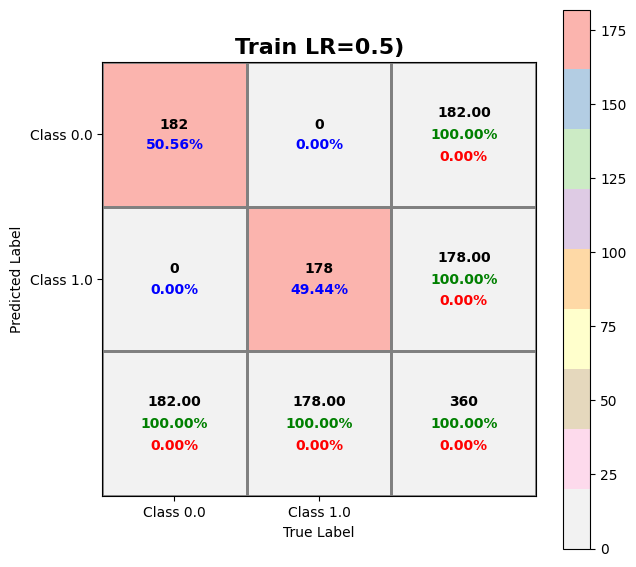

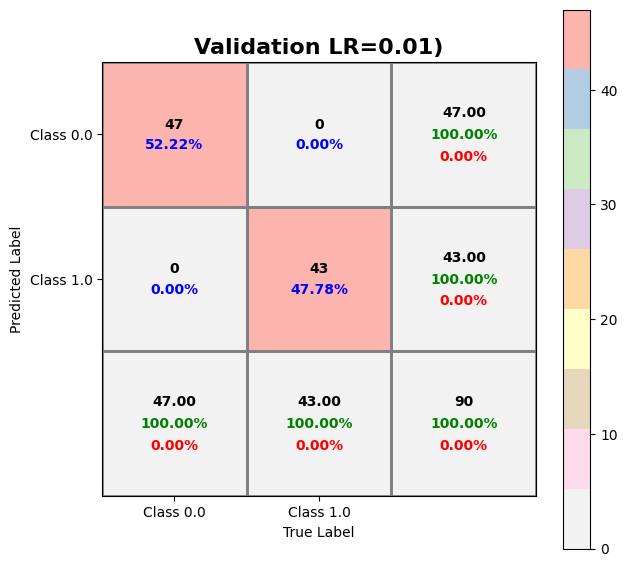

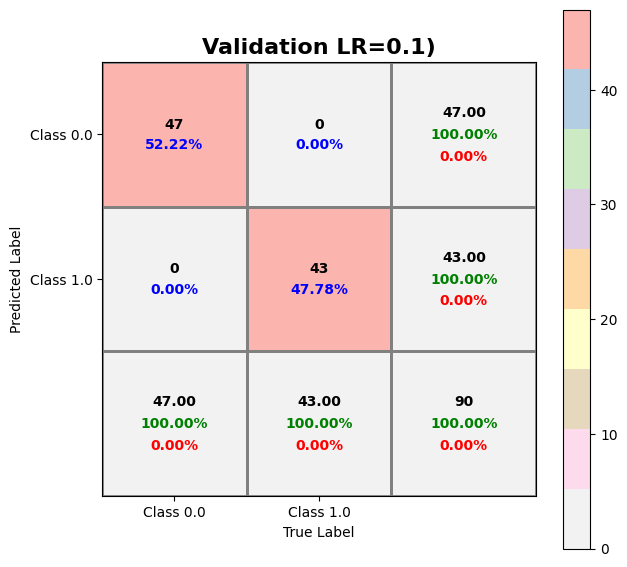

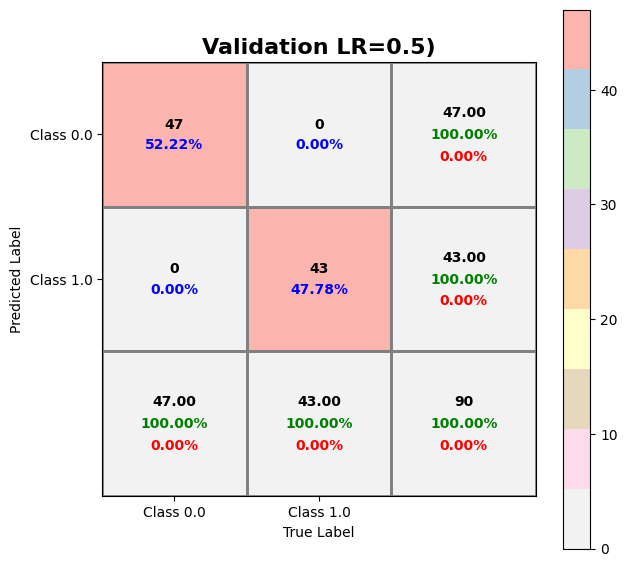

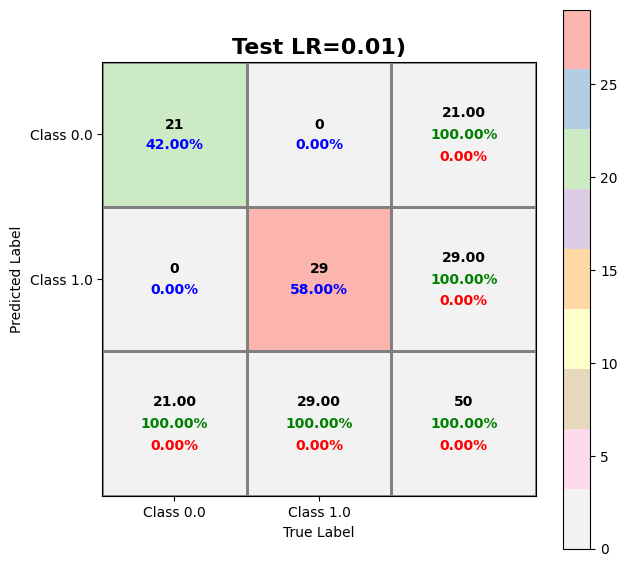

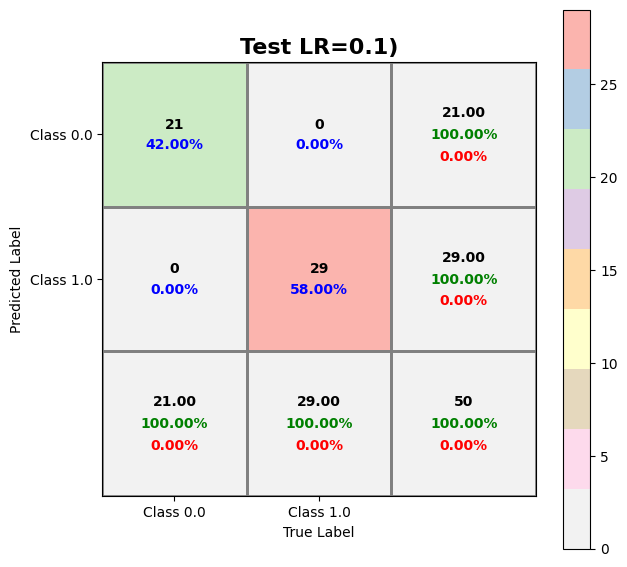

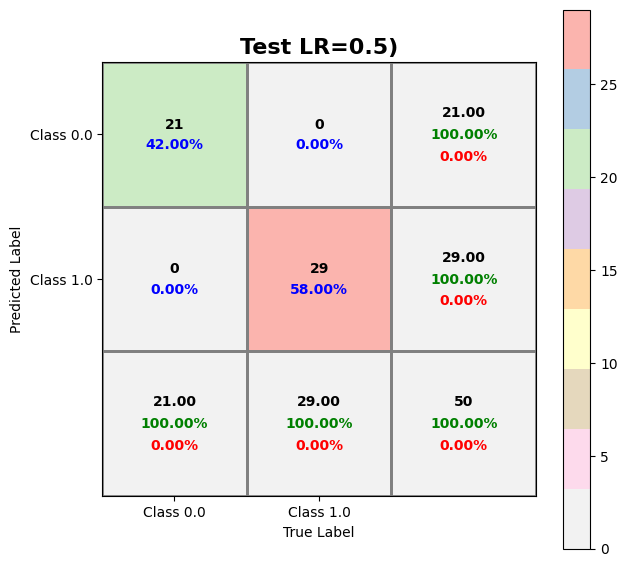

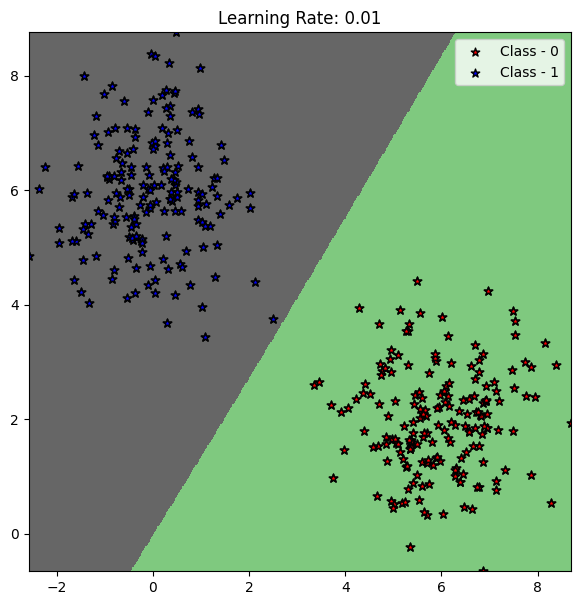

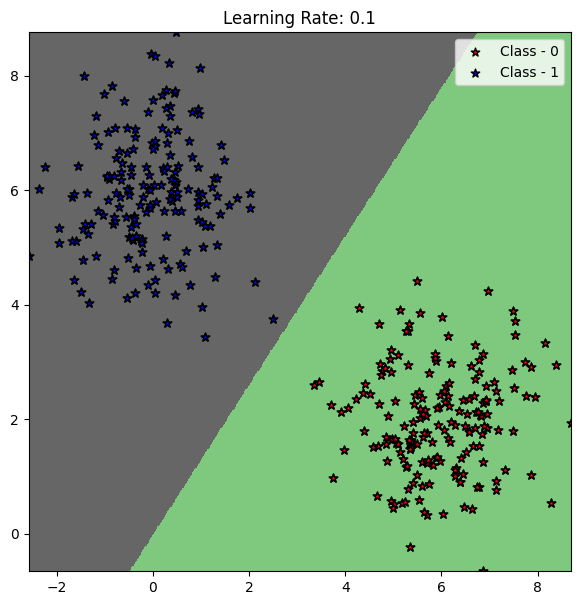

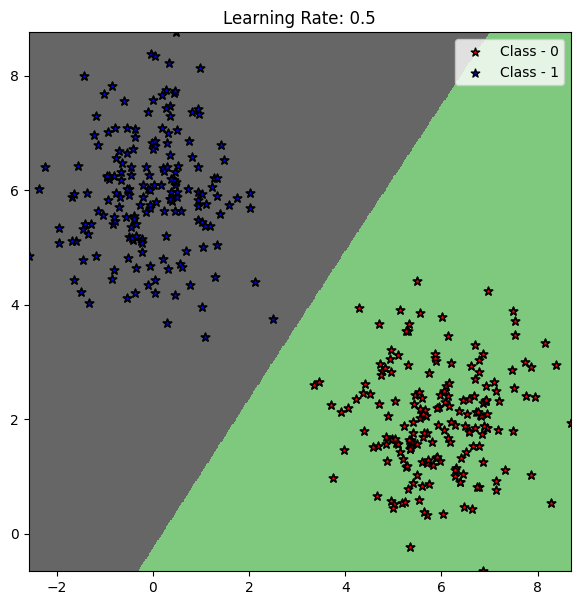

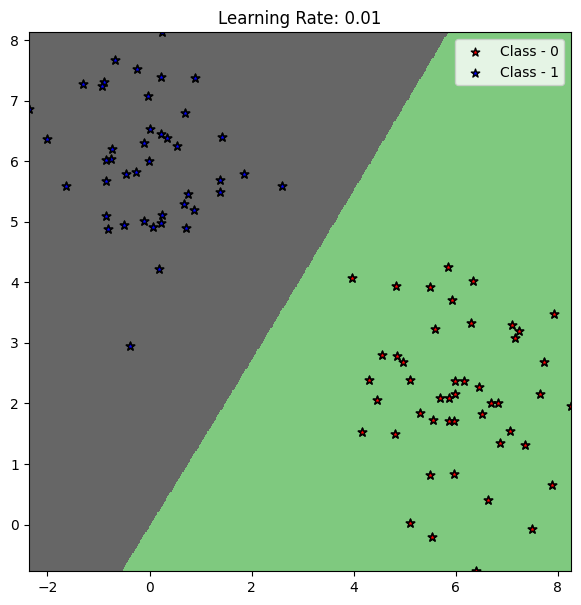

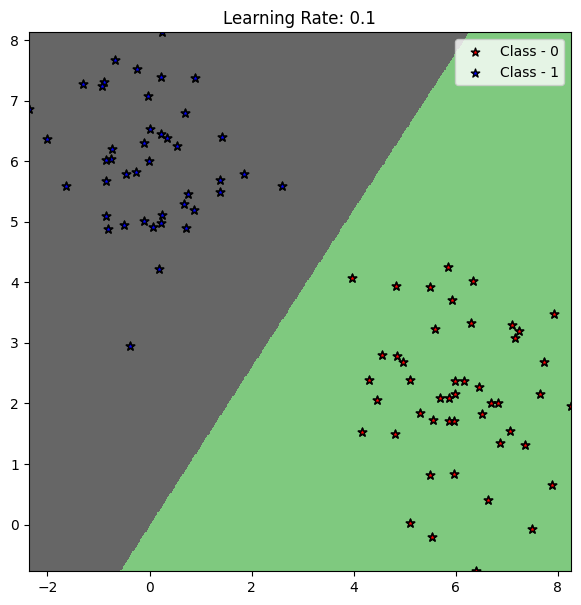

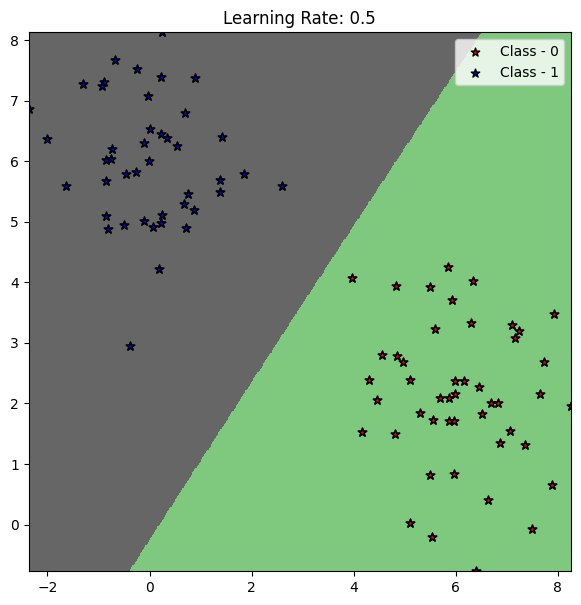

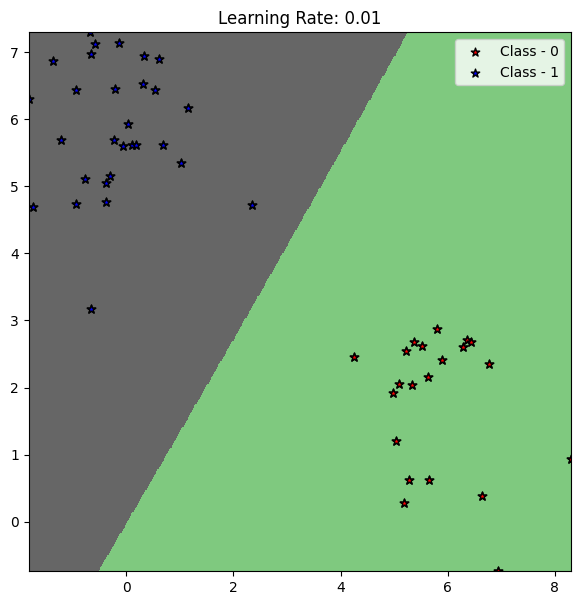

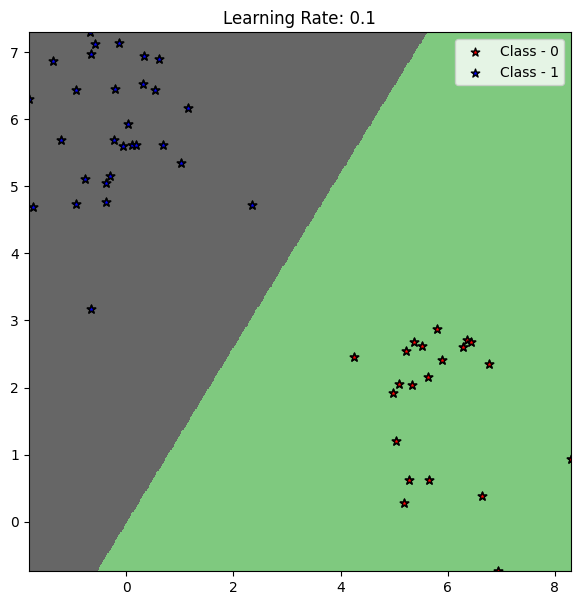

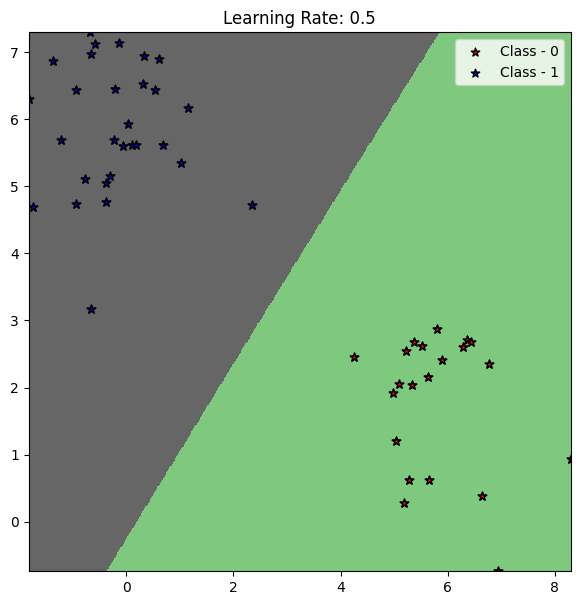

In [8]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


# Function to build and train the model
def build_and_train_model(train_x, train_y, learning_rate):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Build the model
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(2,)),
            tf.keras.layers.Dense(2, activation='softmax')
        ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_x, train_y, epochs=50, batch_size=32, verbose=0)

    return model, history

# Function to calculate classification accuracy and confusion matrix
def evaluate_model(model, x, y):
    # Predictions
    y_pred = np.argmax(model.predict(x, verbose=0), axis=1)

    # Classification accuracy
    accuracy = np.mean(y_pred == y)*100

    return accuracy, y_pred

def confusion_matrix(y_true, y_pred, accuracy, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)
    cm = np.zeros((num_labels + 1, num_labels + 1), float)
    label_to_index = {label: i for i, label in enumerate(labels)}
    true_positives = np.zeros(num_labels)
    pred_positives = np.zeros(num_labels)
    total_samples = len(y_true)
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index, pred_index] += 1
        true_positives[true_index] += 1 if true == pred else 0
        pred_positives[pred_index] += 1 if true == pred else 0
    cm = cm.T
    accuracy = np.sum(np.diag(cm)) / total_samples
    cm[-1, :-1] = (true_positives / np.sum(cm[:-1, :-1], axis=1)) * 100
    cm[:-1, -1] = (pred_positives / np.sum(cm[:-1, :-1], axis=0)) * 100
    cm[-1, -1] = accuracy * 100
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, accuracy, title):
    cm = confusion_matrix(y_true, y_pred, accuracy)
    cm_backup = confusion_matrix(y_true, y_pred, accuracy)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 or j == cm.shape[1] - 1:
                cm[i, j] = 0.0
    number_of_classes = len(np.unique(y_true))
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Pastel1_r)
    cm = cm_backup
    plt.title(title, fontsize=16, weight='bold')
    plt.colorbar()
    labels = []
    for i in np.unique(y_true):
        label = "Class " + str(i)
        labels.append(label)
    plt.xticks(range(len(np.unique(y_true))), labels=labels)
    plt.yticks(range(len(np.unique(y_true))), labels=labels)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

    cm_except_last_row_col = cm[:-1, :-1]
    cm_row_sum = np.sum(cm_except_last_row_col, axis=1)
    cm_col_sum = np.sum(cm_except_last_row_col, axis=0)

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        row_sum = 0
        for j in range(cm.shape[1]):
            if i == cm.shape[0] - 1 and j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(y_true.size, "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif j == cm.shape[1] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_row_sum[i], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            elif i == cm.shape[0] - 1:
                plt.text(
                    j,
                    i - 0.15,
                    format(cm_col_sum[j], ".2f"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i,
                    format(cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="green",
                )
                plt.text(
                    j,
                    i + 0.15,
                    format(100 - cm[i, j], ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="red",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)
            else:
                percent = (cm[i, j] / y_true.size) * 100
                plt.text(
                    j,
                    i - 0.07,
                    format(int(cm[i, j]), "d"),
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="black",
                )
                plt.text(
                    j,
                    i + 0.07,
                    format(percent, ".2f") + "%",
                    ha="center",
                    va="center",
                    fontweight="bold",
                    color="blue",
                )
                rect = plt.Rectangle(
                    (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="grey", linewidth=2
                )
                plt.gca().add_patch(rect)

    plt.grid(False)
    plt.show()

def plot_decision_boundary(model, learning_rate, x, y):

    N = 500

    # Create a meshgrid to plot decision regions
    x_min, x_max = x[:, 0].min(), x[:, 0].max()
    y_min, y_max = x[:, 1].min(), x[:, 1].max()
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
    xx, yy = np.meshgrid(x_range, y_range)

    Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0), axis=1)
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    classes = np.unique(y)
    number_of_classes = len(classes)
    plt.figure(figsize=(number_of_classes + 5, number_of_classes + 5))
    plt.pcolormesh(xx, yy, Z, cmap='Accent')
    for class_label in classes:
        # Filter data points based on the current label
        x_label = x[y == class_label]
        # Plot only once with the label
        if class_label == classes[0]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40)
        if class_label == classes[1]:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='blue', edgecolors="black", marker="*", s=40, label='Class - '+str(int(class_label)))
            # plt.legend()
        else:
            plt.scatter(x_label[:, 0], x_label[:, 1], c='red', edgecolors="black", marker="*", s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend()

    # plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"Learning Rate: {learning_rate}")
    plt.show()

def read_dataset_1(current_directory, folder_number):
    # classification_dataset_1_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    classification_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Classification/Dataset 1/"
        + folder_number
        + "/"
    )

    classification_dataset_1_Train = (
        classification_dataset_1_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    classification_dataset_1_Validation = (
        classification_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    classification_dataset_1_Test = (
        classification_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(classification_dataset_1_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y

def apply_MLFFNN(train_x, train_y, val_x, val_y, test_x, test_y):

    # Define hyperparameters
    learning_rates = [0.01, 0.1, 0.5]  # Different learning rates

    # Dictionary to store results
    results = {}
    models = {}
    histories = {}
    # Loop over different hyperparameters
    for learning_rate in learning_rates:
        # Build and train the model
        model, history = build_and_train_model(train_x, train_y, learning_rate)
        models[learning_rate] = model
        histories[learning_rate] = history

        # Evaluate the model on training data
        train_accuracy, train_y_pred = evaluate_model(model, train_x, train_y)

        # Evaluate the model on validation data
        val_accuracy, val_y_pred = evaluate_model(model, val_x, val_y)

        # Evaluate the model on test data
        test_accuracy, test_y_pred = evaluate_model(model, test_x, test_y)

        # Store results
        results[learning_rate] = {
            'train_accuracy': train_accuracy,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy,
            'train_y_pred': train_y_pred,
            'val_y_pred': val_y_pred,
            'test_y_pred': test_y_pred
        }

    # Print the table of classification accuracies
    print("Classification Accuracies:")
    print("{:<15} {:<15} {:<15} {:<15}".format("Learning Rate", "Train Accuracy(%)", "Validation Accuracy(%)", "Test Accuracy(%)"))
    for learning_rate, result in results.items():
        print("{:<15} {:<15.2f} {:<19.2f} {:<15.2f}".format(learning_rate, result['train_accuracy'], result['val_accuracy'], result['test_accuracy']))


    # Plot confusion matrices
    for learning_rate in learning_rates:
        result = results[learning_rate]
        plot_confusion_matrix(train_y, result['train_y_pred'], result['train_accuracy'], title=f"Train LR={learning_rate})")
    for learning_rate in learning_rates:
        result = results[learning_rate]
        plot_confusion_matrix(val_y, result['val_y_pred'], result['val_accuracy'], title=f"Validation LR={learning_rate})")
    for learning_rate in learning_rates:
        result = results[learning_rate]
        plot_confusion_matrix(test_y, result['test_y_pred'], result['test_accuracy'], title=f"Test LR={learning_rate})")

    # Plot decision boundary
    for learning_rate in learning_rates:
        model = models[learning_rate]
        plot_decision_boundary(model, learning_rate, train_x, train_y)
    for learning_rate in learning_rates:
        model = models[learning_rate]
        plot_decision_boundary(model, learning_rate, val_x, val_y)
    for learning_rate in learning_rates:
        model = models[learning_rate]
        plot_decision_boundary(model, learning_rate, test_x, test_y)

    

def main():
    folder_number = "9"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_1(
        current_directory, folder_number
    )
    apply_MLFFNN(train_x, train_y, val_x, val_y, test_x, test_y)

    

if __name__ == "__main__":
    main()
